In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as clrs

from sklearn import preprocessing #ajout du numéro 

import time
import os

%matplotlib inline

---

Chargement des jeux de données
---

In [2]:
!pip3 install pickle5

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pickle5 as pickle

def load_df_pickle(fpath):
    with open(fpath, "rb") as fh:
      return pickle.load(fh)

In [5]:
t_start = time.time()

# df_ath1 = pd.read_pickle("/workspace/input/data/formatted/df_ath1_full.pkl")
# df_ath2 = pd.read_pickle("/workspace/input/data/formatted/df_ath2_full.pkl")
df_ath1 = load_df_pickle("data/df_ath1_full.pkl")
df_ath2 = load_df_pickle("data/df_ath2_full.pkl")

# df_morning_ath1 = pd.read_pickle("/workspace/input/data/formatted/df_ath1_morning.pkl")
# df_morning_ath2 = pd.read_pickle("/workspace/input/data/formatted/df_ath2_morning.pkl")
df_morning_ath1 = load_df_pickle("data/df_ath1_morning.pkl")
df_morning_ath2 = load_df_pickle("data/df_ath2_morning.pkl")

print(f"Time taken: {time.time()-t_start}")

Time taken: 1.3546080589294434


In [6]:
print("athlete 1")
print("df_ath1.shape          ", df_ath1.shape)
print("df_morning_ath1.shape  ", df_morning_ath1.shape)

print(" \n ----------------------------------------- \n ")

print("athlete 2")
print("df_ath2.shape          ", df_ath2.shape)
print("df_morning_ath2.shape  ", df_morning_ath2.shape)

athlete 1
df_ath1.shape           (1040076, 28)
df_morning_ath1.shape   (150, 20)
 
 ----------------------------------------- 
 
athlete 2
df_ath2.shape           (903061, 28)
df_morning_ath2.shape   (20, 20)


---

## Regarder la complétion des données

In [7]:
%run utils.ipynb
# %timeit df_completion(df_ath1, df_ath2)

df_completion(df_ath1, df_ath2)

,ath1,ath2
Timestamp,100.0%,100.0%
tps,100.0%,100.0%
date,100.0%,100.0%
training_counter,100.0%,100.0%
day_index,100.0%,100.0%
training_index,100.0%,100.0%
type_ent,100.0%,100.0%
day_cycle,100.0%,32.1%
phase,100.0%,32.1%
activite,100.0%,100.0%


---

# Répartition des différents entraînements

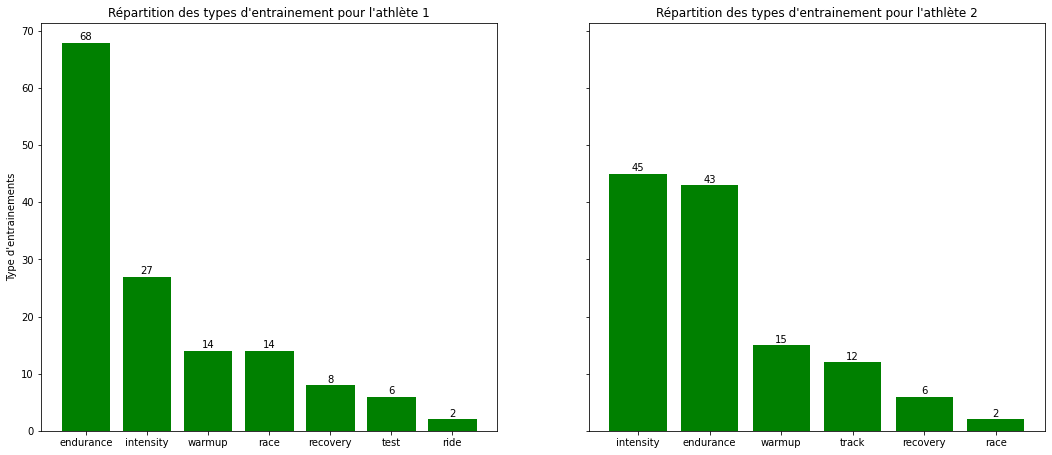

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18., 7.5), sharey=True)

df_loc = df_ath1.drop_duplicates(['date', 'type_ent'])
ax1.bar(df_loc['type_ent'].value_counts().index, df_loc['type_ent'].value_counts(), color="green")
for n,k in enumerate(df_loc['type_ent'].value_counts()):
    ax1.text(n, k+1, str(k), horizontalalignment = 'center', verticalalignment = 'center')
ax1.title.set_text("Répartition des types d'entrainement pour l'athlète 1")

df_loc = df_ath2.drop_duplicates(['date', 'type_ent'])
ax2.bar(df_loc['type_ent'].value_counts().index, df_loc['type_ent'].value_counts(), color="green")
for n,k in enumerate(df_loc['type_ent'].value_counts()):
    ax2.text(n, k+1, str(k), horizontalalignment = 'center', verticalalignment = 'center')
ax2.title.set_text("Répartition des types d'entrainement pour l'athlète 2")

ax1.set_ylabel("Type d'entrainements");

In [9]:
%run utils.ipynb

dates_ath1 = df_ath1['date'].unique()
focus_on_training(df_ath1, list_dates=dates_ath1[:5])

Entraînement [1]:['endurance'], le 2021-03-27 avec 4041 points, de 16:02:36 à 17:09:56, durée = 0 days 01:07:20 - phase du cycle: ['Unknown']
Entraînement [2]:['endurance'], le 2021-04-05 avec 6641 points, de 11:21:58 à 13:12:38, durée = 0 days 01:50:40 - phase du cycle: ['Folliculaire']
Entraînement [3]:['endurance'], le 2021-04-07 avec 9023 points, de 13:24:57 à 15:55:19, durée = 0 days 02:30:22 - phase du cycle: ['Folliculaire']
Entraînement [4]:['intensity'], le 2021-04-08 avec 3949 points, de 17:39:21 à 18:45:09, durée = 0 days 01:05:48 - phase du cycle: ['Folliculaire']
Entraînement [5]:['endurance'], le 2021-04-10 avec 6812 points, de 13:45:38 à 15:39:09, durée = 0 days 01:53:31 - phase du cycle: ['Lutéale']


---

## Regarder les corrélations dans les données

#### Deux tableaux côte à côte pour les comparer

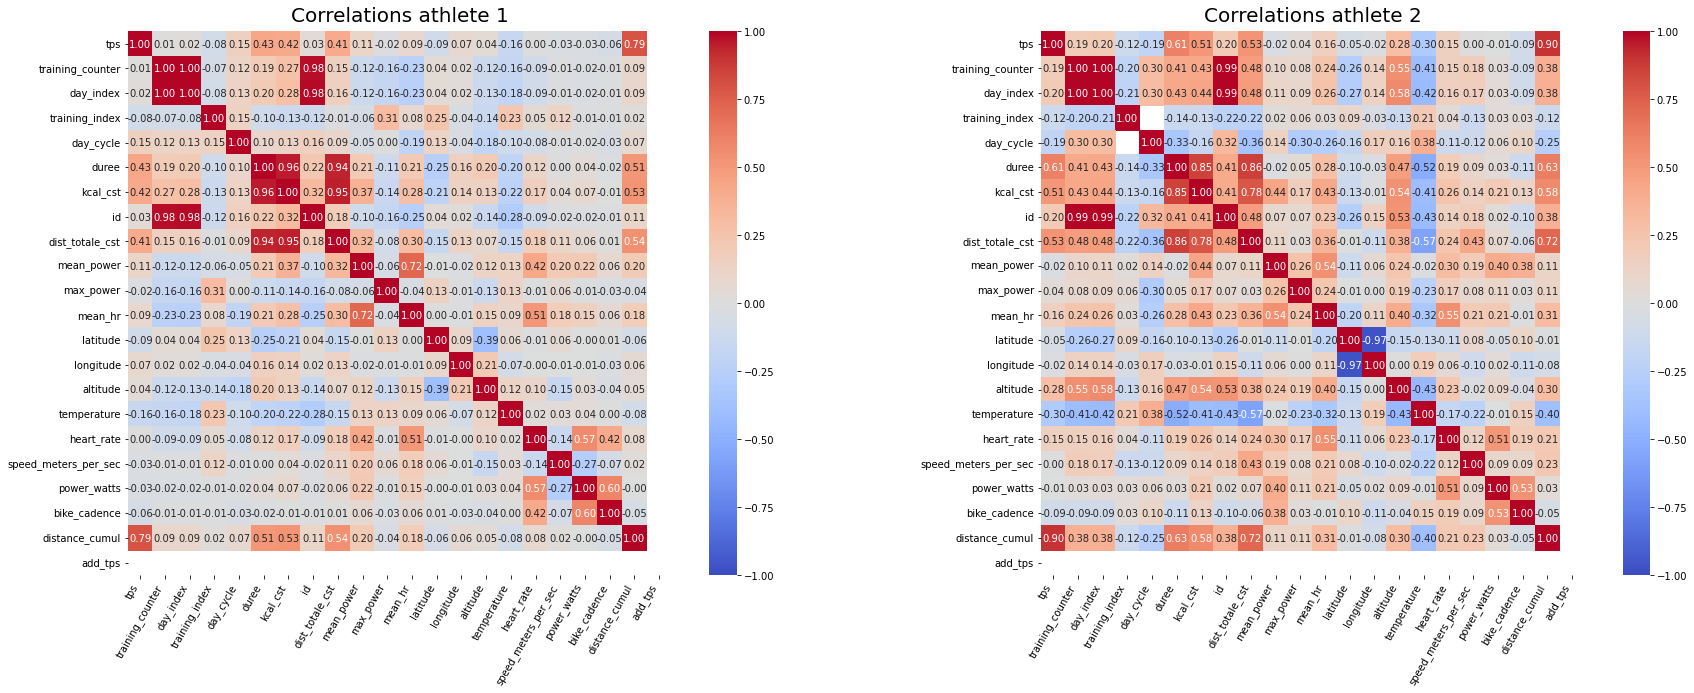

In [10]:
corr1 = df_ath1.corr(method='pearson')
corr2 = df_ath2.corr(method='pearson')


fig, ax = plt.subplots(1,2, figsize=(30, 10));

g1 = sns.heatmap(corr1, cmap='coolwarm', vmin=-1.0, vmax=1.0, ax=ax[0], square=True, annot=True, fmt=".2f");
g1.set_xticklabels(g1.get_xticklabels(), rotation=60, fontdict={"horizontalalignment":"right"});
g1.set_title(label='Correlations athlete 1', fontsize=20, loc='center', pad=10);

g2 = sns.heatmap(corr2, cmap='coolwarm', vmin=-1.0, vmax=1.0, ax=ax[1], square=True, annot=True, fmt=".2f");
g2.set_xticklabels(g2.get_xticklabels(), rotation=60, fontdict={"horizontalalignment":"right"});
g2.set_title(label='Correlations athlete 2', fontsize=20, loc='center', pad=10);

#### Un seul tableau à la fois, peut-être plus lisible

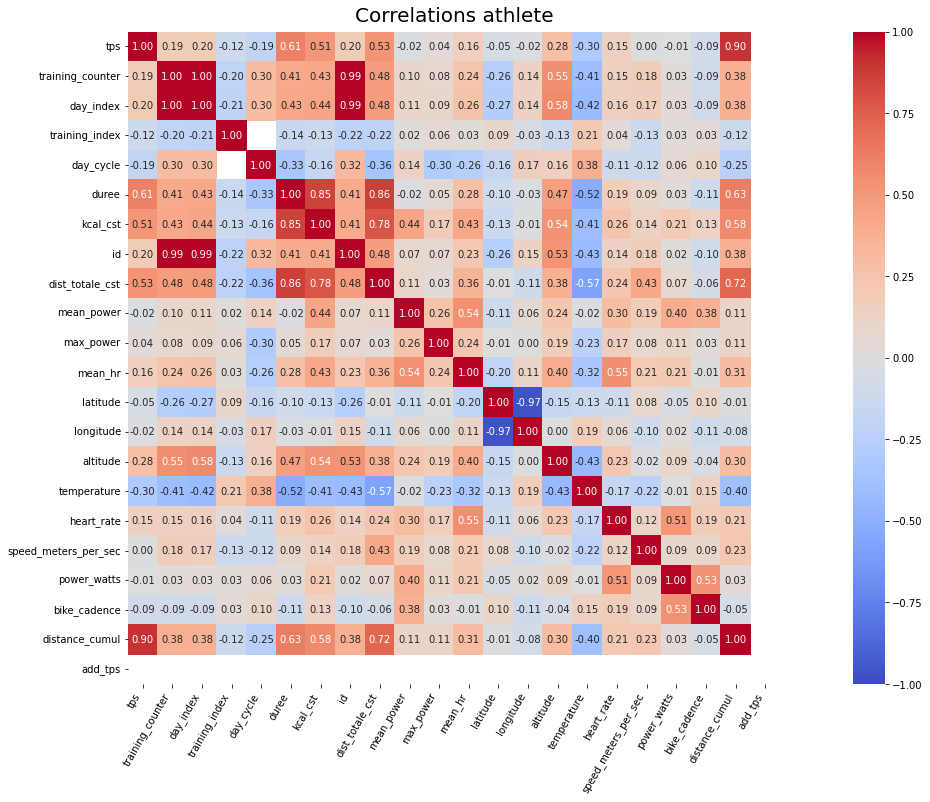

In [12]:
corr = df_ath2.corr(method='pearson')

fig, ax = plt.subplots(1,1, figsize=(26, 12));

g = sns.heatmap(corr, cmap='coolwarm', vmin=-1.0, vmax=1.0, ax=ax, square=True, annot=True, fmt=".2f");
g.set_xticklabels(g1.get_xticklabels(), rotation=60, fontdict={"horizontalalignment":"right"});
g.set_title(label='Correlations athlete', fontsize=20, loc='center', pad=10);

---

## Filtrer le dataframe

In [13]:
print(df_ath1.columns.tolist())

['Timestamp', 'tps', 'date', 'training_counter', 'day_index', 'training_index', 'type_ent', 'day_cycle', 'phase', 'activite', 'duree', 'kcal_cst', 'id', 'dist_totale_cst', 'mean_power', 'max_power', 'mean_hr', 'name', 'latitude', 'longitude', 'altitude', 'temperature', 'heart_rate', 'speed_meters_per_sec', 'power_watts', 'bike_cadence', 'distance_cumul', 'add_tps']


In [15]:
%run utils.ipynb

df_exemple1 = filter_df(df_ath1, qtty="date", filtre={'kind':'include', 'list':["2021-06-09"]})
print(f"df_exemple1.shape : {df_exemple1.shape}")

df_exemple2 = filter_df(df_ath1, qtty="date", filtre={'kind':'exclude', 'list':["2021-06-09"]})
print(f"df_exemple2.shape : {df_exemple2.shape}")

df_exemple3 = filter_df(df_ath1, qtty="type_ent", filtre={'kind':'include', 'list':["endurance", "intensity"]})
print(f"df_exemple3.shape : {df_exemple3.shape}")

df_exemple1.shape : (17397, 28)
df_exemple2.shape : (17397, 28)
df_exemple3.shape : (849331, 28)


In [16]:
df_exemple1

,Timestamp,tps,date,training_counter,day_index,training_index,type_ent,day_cycle,phase,activite,...,latitude,longitude,altitude,temperature,heart_rate,speed_meters_per_sec,power_watts,bike_cadence,distance_cumul,add_tps
365950,2021-06-09 13:54:52,1,2021-06-09,53,43,1,endurance,22,Lutéale,ROAD_BIKING,...,46.101,4.312,588.6,19.0,123.0,10.124,0.0,0.0,10.080,0.0
365951,2021-06-09 13:54:53,2,2021-06-09,53,43,1,endurance,22,Lutéale,ROAD_BIKING,...,46.101,4.312,588.0,19.0,123.0,10.133,0.0,0.0,20.090,0.0
365952,2021-06-09 13:54:54,3,2021-06-09,53,43,1,endurance,22,Lutéale,ROAD_BIKING,...,46.101,4.312,587.8,19.0,123.0,10.348,0.0,0.0,30.220,0.0
365953,2021-06-09 13:54:55,4,2021-06-09,53,43,1,endurance,22,Lutéale,ROAD_BIKING,...,46.101,4.312,587.0,19.0,NaN,10.469,0.0,0.0,40.640,0.0
365954,2021-06-09 13:54:56,5,2021-06-09,53,43,1,endurance,22,Lutéale,ROAD_BIKING,...,46.101,4.312,586.4,19.0,123.0,10.758,0.0,0.0,51.260,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383342,2021-06-09 18:44:44,17393,2021-06-09,53,43,1,endurance,22,Lutéale,ROAD_BIKING,...,46.101,4.307,604.2,21.0,159.0,4.787,0.0,0.0,124433.320,0.0
383343,2021-06-09 18:44:45,17394,2021-06-09,53,43,1,endurance,22,Lutéale,ROAD_BIKING,...,46.101,4.307,604.2,21.0,159.0,3.060,0.0,0.0,124437.078,0.0
383344,2021-06-09 18:44:46,17395,2021-06-09,53,43,1,endurance,22,Lutéale,ROAD_BIKING,...,46.101,4.307,604.0,21.0,158.0,1.791,0.0,0.0,124439.359,0.0
383345,2021-06-09 18:44:47,17396,2021-06-09,53,43,1,endurance,22,Lutéale,ROAD_BIKING,...,46.101,4.307,603.8,21.0,157.0,0.000,0.0,0.0,124440.617,0.0


---

# Quelques propositions de plots

Entraînement: intensity - # de date 27 - # de points : 129572
Entraînement: race - # de date 14 - # de points : 122586


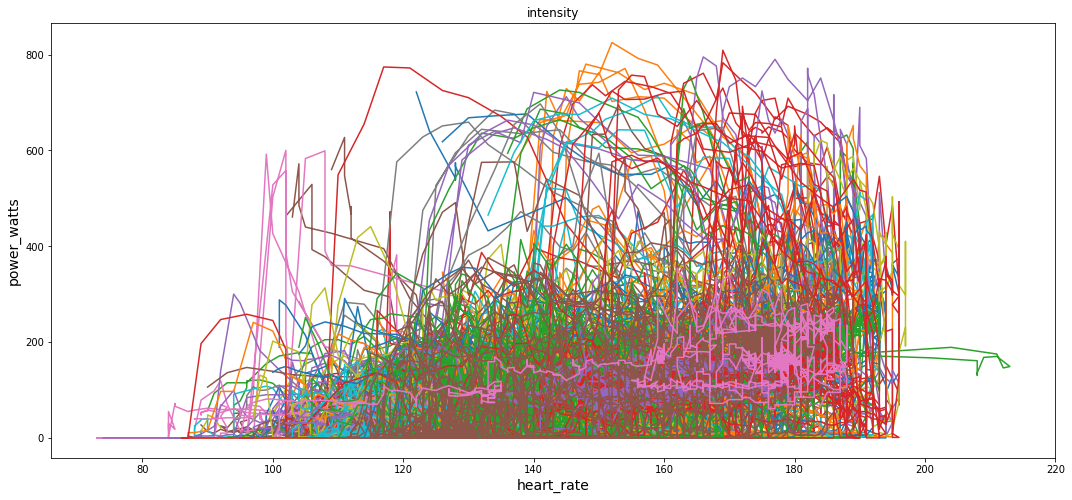

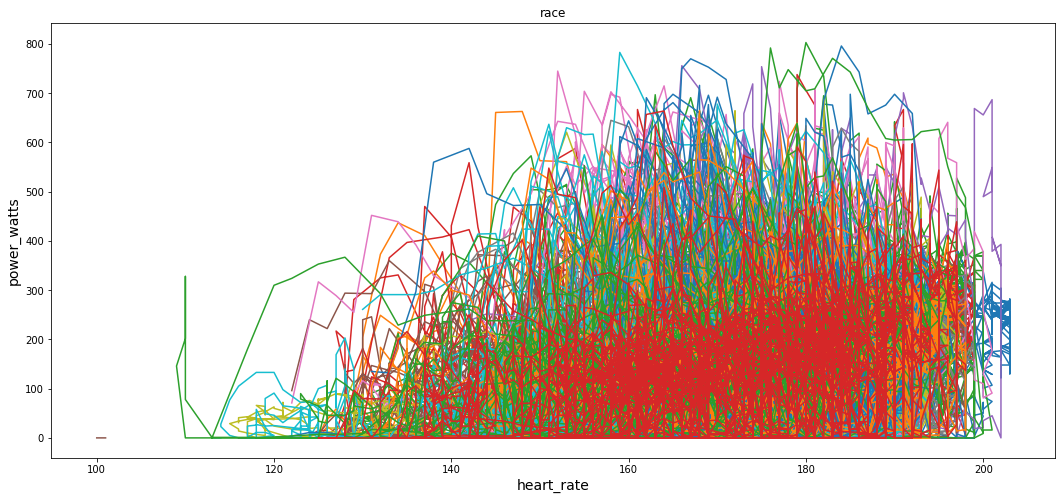

In [18]:
%run utils.ipynb

#C> - df_ath1["type_ent"].unique()   #C> --> ['endurance', 'intensity', 'recovery', 'race', 'warmup', 'test', 'ride', 'nan']
list_valeurs = ["intensity", "race"]

for train in list_valeurs:
    df_reduced = filter_df(df_ath1, qtty="type_ent", filtre={'kind':'include', 'list':[train]})
    print(f"Entraînement: {train} - # de date {len(df_reduced['date'].unique())} - # de points : {len(df_reduced)}")

    plot_df(df_reduced, qtty_x='heart_rate', qtty_y='power_watts', groupby='date', figtitle=train, tuple_figsize=(18.,8.))

---

## Comparer différentes valeurs pour un entraînement, ou sur plusieurs entraînement

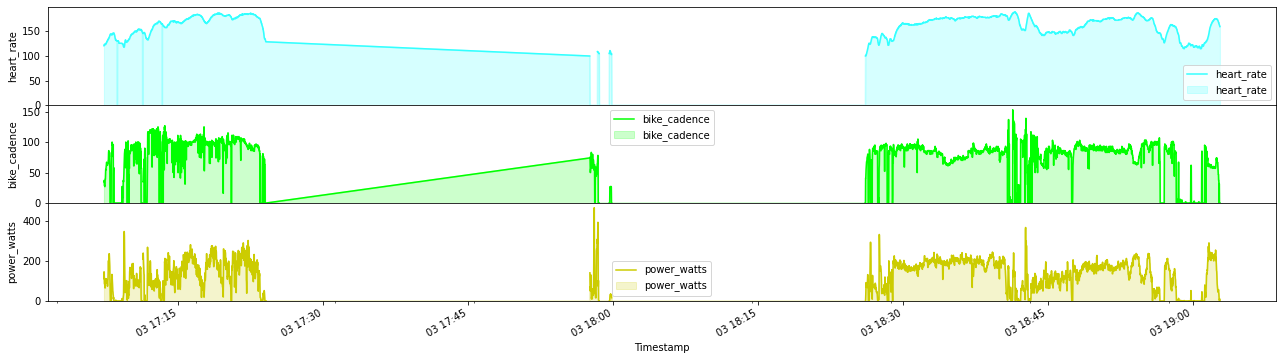

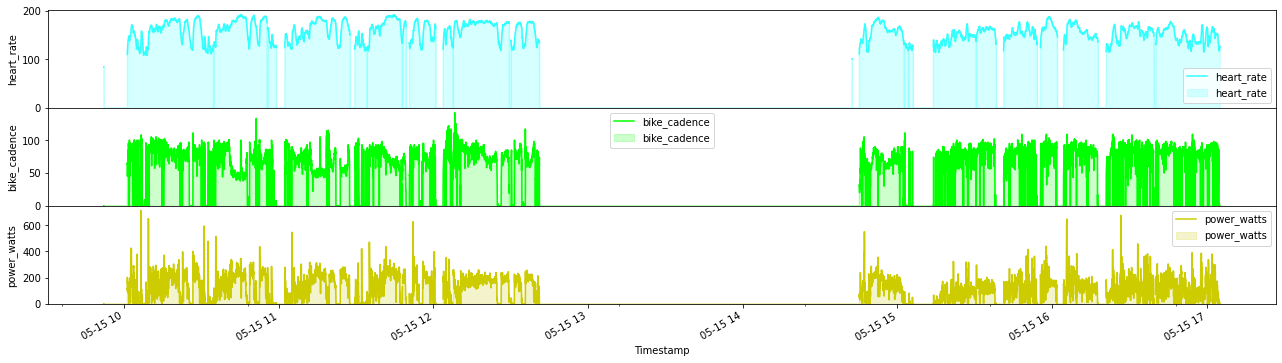

In [19]:
%run utils.ipynb


list_dates = ['2021-05-03', '2021-05-15'] #, '2021-06-05', '2021-06-11', '2021-06-30', '2021-07-30', '2021-07-31', '2021-08-20']

list_to_plot = ["heart_rate", "bike_cadence", "power_watts"]#, "altitude", "temperature"]

for ctr, date in enumerate(list_dates):
    df_reduced = filter_df(df_ath1, qtty="date", filtre={'kind':'include', 'list':[date]})

    plot_df_1day_time_series(df_reduced, x_qtty="Timestamp", qtties_plot=list_to_plot, tuple_figsize=(22.,6.), shade_area=True)

---

## Get dataframe formatted for time series investigation

In [ ]:
%run utils.ipynb

time_series = ['latitude', 'longitude', 'altitude', 'temperature', 'heart_rate', 'speed_meters_per_sec', 'power_watts', 'bike_cadence', 'distance_cumul']

df_ath1_ts = make_df_timeseries(df_ath1, qtties=time_series)